# **Assignment 1 :**

**Data Exploration and Preprocessing**

# **Names:**

**Ahmed Abd Elrahman Anwar  (6)**
  
**Abd Elrahman Shams  (39)**

# **Exploring Dataset**



*   Total number of Instances = 2310
  *  Training data: 210 samples
  *  Testing data: 2100 samples
  


*   Classes are brickface, sky, foliage, cement, window, path, and grass.
*   Classes are distributed between training data and testing data as following

      *   30 instances per class for training data.
      *   300 instances per class for test data.
      

*   Total number of Attributes = 19
*   Attribute Information as described in DataSet Description
    
    1.  region-centroid-col:  the column of the center pixel of the region.
    2.  region-centroid-row:  the row of the center pixel of the region.
    3.  region-pixel-count:  the number of pixels in a region = 9.
    4.  short-line-density-5:  the results of a line extractoin algorithm that 
         counts how many lines of length 5 (any orientation) with
         low contrast, less than or equal to 5, go through the region.
    5.  short-line-density-2:  same as short-line-density-5 but counts lines
         of high contrast, greater than 5.
    6.  vedge-mean:  measure the contrast of horizontally
         adjacent pixels in the region.  There are 6, the mean and 
         standard deviation are given.  This attribute is used as
        a vertical edge detector.
    7.  vegde-sd:  (see 6)
    8.  hedge-mean:  measures the contrast of vertically adjacent
          pixels. Used for horizontal line detection. 
    9.  hedge-sd: (see 8).
    10. intensity-mean:  the average over the region of (R + G + B)/3
    11. rawred-mean: the average over the region of the R value.
    12. rawblue-mean: the average over the region of the B value.
    13. rawgreen-mean: the average over the region of the G value.
    14. exred-mean: measure the excess red:  (2R - (G + B))
    15. exblue-mean: measure the excess blue:  (2B - (G + R))
    16. exgreen-mean: measure the excess green:  (2G - (R + B))
    17. value-mean:  3-d nonlinear transformation
         of RGB. (Algorithm can be found in Foley and VanDam, Fundamentals
         of Interactive Computer Graphics)
    18. saturatoin-mean:  (see 17)
    19. hue-mean:  (see 17)


# Import Required Libraries

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load DataSet

In [0]:
def load_data(url):
  # skip the first 2 rows and add the label field to the column names
  data = pd.read_csv(url, skiprows=2, index_col=False)
  column_names = ['Label'] + list(data.columns.astype('str'))
  data = pd.read_csv(url, skiprows=4, index_col=False, names=column_names)
  return data

In [0]:
# load training data
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.data'
train_data = load_data(train_url)
train_data.head()

,Label,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [0]:
# load testing data
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.test'
test_data = load_data(test_url)
test_data.head()

,Label,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,GRASS,110.0,189.0,9,0.0,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86.0,187.0,9,0.0,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225.0,244.0,9,0.0,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47.0,232.0,9,0.0,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97.0,186.0,9,0.0,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654


In [0]:
# Concatenate test and train data using pandas
data_set = pd.concat([train_data, test_data])
data_set.sort_values('Label')
print("Total instances exist in dataset is {} ".format(data_set.shape[0]))
data_set.head()

Total instances exist in dataset is 2310 


,Label,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [0]:
# find all classes in data set
detected_class = np.array(list(set(np.array(data_set)[:, 0])))
print('classes : {}'.format(detected_class))

classes : ['SKY' 'GRASS' 'FOLIAGE' 'PATH' 'WINDOW' 'BRICKFACE' 'CEMENT']


# DataSet Overview

In [0]:
data_set.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
count,2310.000000,2310.000000,2310.0,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2.310000e+03,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000
mean,124.913853,123.417316,9.0,0.014334,0.004714,1.893939,5.709320,2.424723,8.243692e+00,37.051595,32.821308,44.187879,34.145599,-12.690861,21.408850,-8.717989,45.137470,0.426893,-1.362897
std,72.956532,57.483851,0.0,0.040154,0.024234,2.698908,44.846457,3.610084,5.881152e+01,38.176410,35.036774,43.527461,36.364773,11.583562,19.571819,11.551628,42.921764,0.228309,1.545335
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.589457e-08,0.000000,0.000000,0.000000,0.000000,-49.666668,-12.444445,-33.888890,0.000000,0.000000,-3.044175
25%,62.000000,81.000000,9.0,0.000000,0.000000,0.722222,0.355555,0.777780,4.216373e-01,7.296296,7.000000,9.555555,6.027778,-18.555555,4.138889,-16.777779,11.555555,0.284235,-2.188057
50%,121.000000,122.000000,9.0,0.000000,0.000000,1.222224,0.833333,1.444444,9.629633e-01,21.592592,19.555555,27.666667,20.333334,-10.888889,19.666666,-10.888889,28.666666,0.374803,-2.051200
75%,189.000000,172.000000,9.0,0.000000,0.000000,2.166667,1.806367,2.555556,2.183269e+00,53.212964,47.333332,64.888890,46.500001,-4.222222,35.777780,-3.222222,64.888890,0.540123,-1.562308
max,254.000000,251.000000,9.0,0.333333,0.222222,29.222221,991.718400,44.722225,1.386329e+03,143.444440,137.111110,150.888890,142.555560,9.888889,82.000000,24.666666,150.888890,1.000000,2.912480


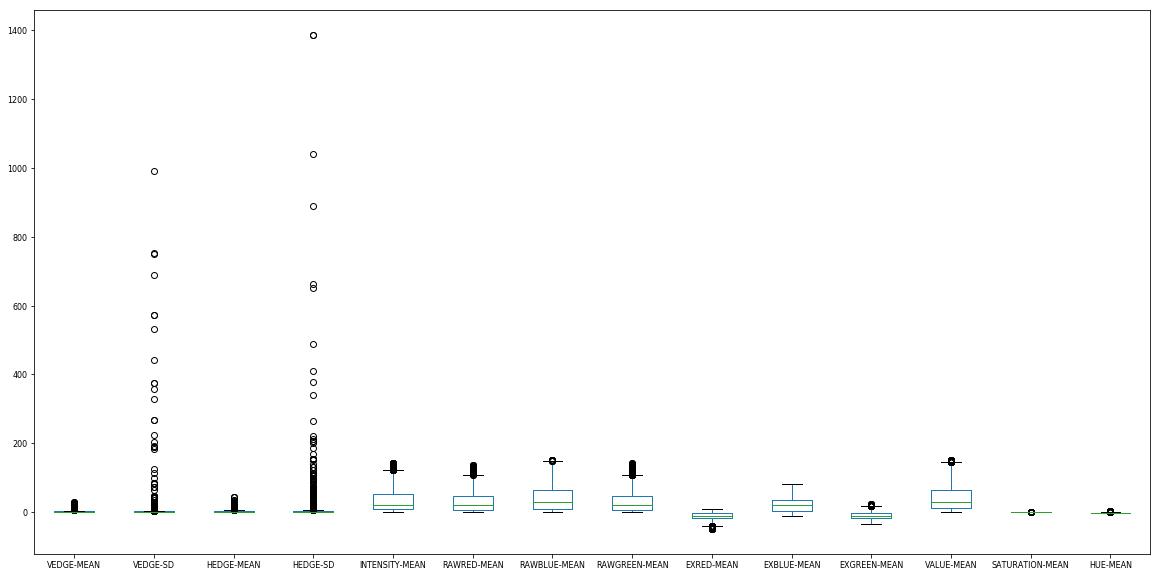

In [0]:
# plot the boxplots for entire dataset
data_set.iloc[:,6:].boxplot(grid=False, fontsize=8, figsize=(20,10))

# Pearson Correlation

In [0]:
# Pearson’s correlation Matrix
correlation_matrix = data_set.corr(method='pearson')
display(correlation_matrix)

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
REGION-CENTROID-COL,1.000000,0.026768,NaN,-0.051962,-0.015964,-0.011304,0.021960,-0.018914,-0.001939,0.058957,0.054673,0.058169,0.063381,-0.086816,0.043098,0.014035,0.060189,-0.108214,0.039299
REGION-CENTROID-ROW,0.026768,1.000000,NaN,0.064891,0.041869,0.026146,-0.053578,0.105223,-0.021077,-0.465240,-0.468009,-0.481521,-0.437971,0.353175,-0.490219,0.476421,-0.458388,0.081556,0.592930
REGION-PIXEL-COUNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SHORT-LINE-DENSITY-5,-0.051962,0.064891,NaN,1.000000,-0.009024,-0.020206,-0.032781,-0.021286,-0.037996,-0.018211,-0.016755,-0.021392,-0.015604,0.028013,-0.036164,0.033182,-0.015886,-0.043221,0.112989
SHORT-LINE-DENSITY-2,-0.015964,0.041869,NaN,-0.009024,1.000000,0.262575,0.193728,0.303182,0.243155,-0.006911,-0.012471,0.003078,-0.013435,-0.044829,0.060979,-0.058362,-0.000145,0.016208,-0.082939
VEDGE-MEAN,-0.011304,0.026146,NaN,-0.020206,0.262575,1.000000,0.637452,0.559491,0.488347,0.005129,-0.005482,0.020498,-0.003099,-0.100457,0.106744,-0.080120,0.018148,-0.064827,-0.097959
VEDGE-SD,0.021960,-0.053578,NaN,-0.032781,0.193728,0.637452,1.000000,0.471016,0.703049,0.003006,-0.002138,0.006782,0.003410,-0.049123,0.027659,0.002396,0.004804,0.002306,-0.061591
HEDGE-MEAN,-0.018914,0.105223,NaN,-0.021286,0.303182,0.559491,0.471016,1.000000,0.668179,0.033973,0.026059,0.043846,0.029406,-0.099434,0.093738,-0.059111,0.042232,-0.125955,-0.093803
HEDGE-SD,-0.001939,-0.021077,NaN,-0.037996,0.243155,0.488347,0.703049,0.668179,1.000000,0.013518,0.008538,0.016899,0.014121,-0.056186,0.033647,-0.000666,0.014858,-0.024149,-0.069988
INTENSITY-MEAN,0.058957,-0.465240,NaN,-0.018211,-0.006911,0.005129,0.003006,0.033973,0.013518,1.000000,0.998112,0.995809,0.995842,-0.830261,0.792257,-0.509756,0.997385,-0.608290,-0.329845


Notice that pearson coeff between **REGION-PIXEL-COUNT** feature with all the others features is NaN as all **REGION-PIXEL-COUNT** values are the same which is equal to 9 . So the variance of **REGION-PIXEL-COUNT** feature is 0. So when we calculate the pearson using the following formula :
$$ r(A,B) = \frac{Cov(A,B)}{\sigma A \ \sigma B} $$
we will get
$$ r(A,B) = \frac{Cov(A,B)}{zero} $$
which will result NaN value


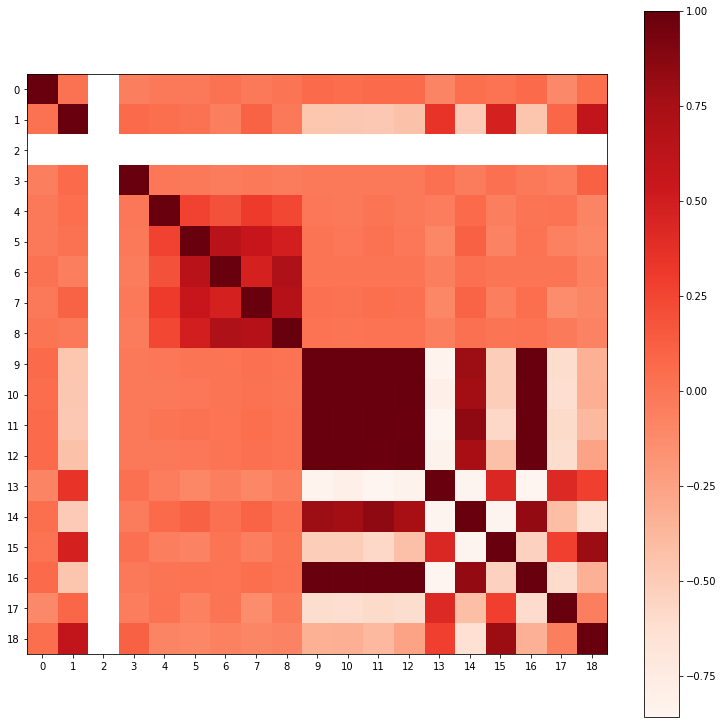

In [0]:
def visualize_matrix(matrix, norm=False):
  fig = plt.figure(figsize = (13,13))
  if norm==False:
    plt.imshow(matrix, cmap='Reds')
  else:
    plt.imshow(matrix, cmap='Reds', vmin=0, vmax=1)
  plt.colorbar()
  plt.xticks([i for i in range(0,matrix.shape[0])])
  plt.yticks([i for i in range(0,matrix.shape[0])])

visualize_matrix(correlation_matrix)

# Calculating Convariance Matrix

In [0]:
covariance_matrix = data_set.cov()
display(covariance_matrix)

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
REGION-CENTROID-COL,5322.655633,112.261605,0.0,-0.152222,-0.028226,-2.225830,71.850789,-4.981611,-8.318737,164.209187,139.753091,184.722513,168.151958,-73.368285,61.539978,11.828309,188.478189,-1.802488,4.430609
REGION-CENTROID-ROW,112.261605,3304.393117,0.0,0.149783,0.058327,4.056431,-138.121244,21.835935,-71.256512,-1020.982645,-942.593272,-1204.825006,-915.529680,235.168129,-551.527028,316.358899,-1130.983933,1.070354,52.671047
REGION-PIXEL-COUNT,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SHORT-LINE-DENSITY-5,-0.152222,0.149783,0.0,0.001612,-0.000009,-0.002190,-0.059032,-0.003086,-0.089729,-0.027916,-0.023573,-0.037389,-0.022785,0.013029,-0.028421,0.015391,-0.027379,-0.000396,0.007011
SHORT-LINE-DENSITY-2,-0.028226,0.058327,0.0,-0.000009,0.000587,0.017174,0.210548,0.026525,0.346558,-0.006394,-0.010589,0.003247,-0.011840,-0.012584,0.028923,-0.016338,-0.000151,0.000090,-0.003106
VEDGE-MEAN,-2.225830,4.056431,0.0,-0.002190,0.017174,7.284104,77.154914,5.451284,77.513850,0.528485,-0.518380,2.407979,-0.304143,-3.140597,5.638482,-2.497886,2.102268,-0.039945,-0.408560
VEDGE-SD,71.850789,-138.121244,0.0,-0.059032,0.210548,77.154914,2011.204665,76.257247,1854.284580,5.147211,-3.359009,13.239618,5.561028,-25.518664,24.277221,1.241442,9.247399,0.023612,-4.268463
HEDGE-MEAN,-4.981611,21.835935,0.0,-0.003086,0.026525,5.451284,76.257247,13.032705,141.864126,4.682097,3.296073,6.889813,3.860406,-4.158073,6.623148,-2.465074,6.543955,-0.103814,-0.523308
HEDGE-SD,-8.318737,-71.256512,0.0,-0.089729,0.346558,77.513850,1854.284580,141.864126,3458.794558,30.350893,17.592150,43.260490,30.200059,-38.276254,38.728788,-0.452533,37.505597,-0.324256,-6.360770
INTENSITY-MEAN,164.209187,-1020.982645,0.0,-0.027916,-0.006394,0.528485,5.147211,4.682097,30.350893,1457.438265,1335.052524,1654.758170,1382.504132,-367.157227,591.959640,-224.802412,1634.314320,-5.301873,-19.459342


Before Scaling Covariance Matrix


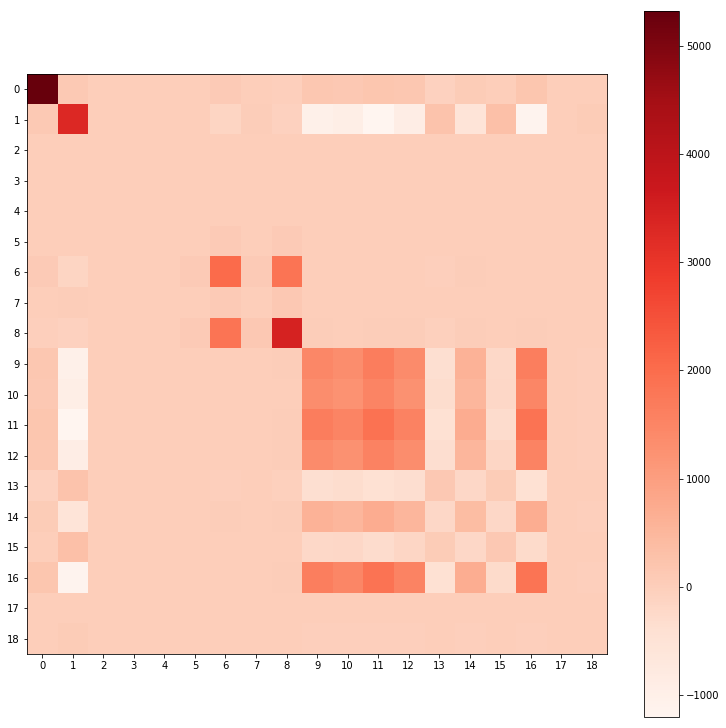

In [0]:
print('Before Scaling Covariance Matrix')
visualize_matrix(covariance_matrix)

After Scaling Covariance Matrix
The Normalize instance used to scale scalar data to the [0, 1] range before mapping to colors using cmap.
By default, a linear scaling mapping the lowest value to 0 and the highest to 1 is used


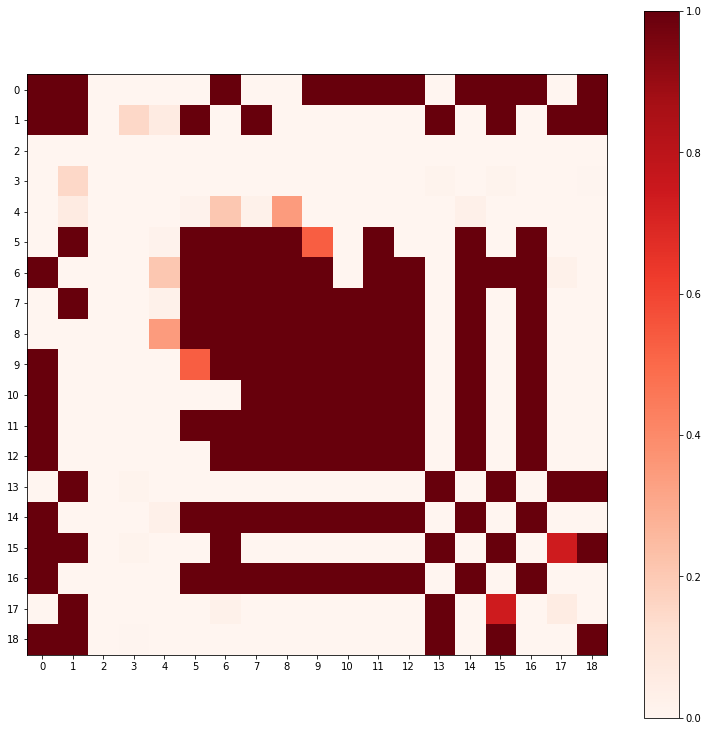

In [0]:
print('After Scaling Covariance Matrix')
visualize_matrix(covariance_matrix, norm=True)
print('The Normalize instance used to scale scalar data to the [0, 1] range before mapping to colors using cmap.\nBy default, a linear scaling mapping the lowest value to 0 and the highest to 1 is used')

# Plotting Histograms

*   Plot the data histogram for each class. Let each class have only one plot with a different color for each
attribute.


In [0]:
# colors for diagrams
colors = ['red', 'tan', 'lime', 'blue', 'green', 'magenta','cyan',
          '#555555', '#000000', '#666666', '#888888', '#777777', 'black',
          '#333333', '#222222', 'pink', 'violet', 'plum', 'navy']

features = ['VEDGE-MEAN','VEDGE-SD',
            'HEDGE-MEAN','HEDGE-SD','INTENSITY-MEAN',
            'RAWRED-MEAN','RAWBLUE-MEAN','RAWGREEN-MEAN',
            'EXRED-MEAN','EXBLUE-MEAN','EXGREEN-MEAN',
            'VALUE-MEAN','SATURATION-MEAN','HUE-MEAN']


features = np.array(features)

#convert data_set type from dataframe to numpy array
data_set = np.array(data_set)

In [0]:
def plot_hist(x, _bins, title, features, x_label="Feature Value", y_label="Value Frequency"):
    
    plt.figure(figsize=[20,10])
    plt.hist(x, bins=_bins, histtype='bar', label = features)
    plt.legend()
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    

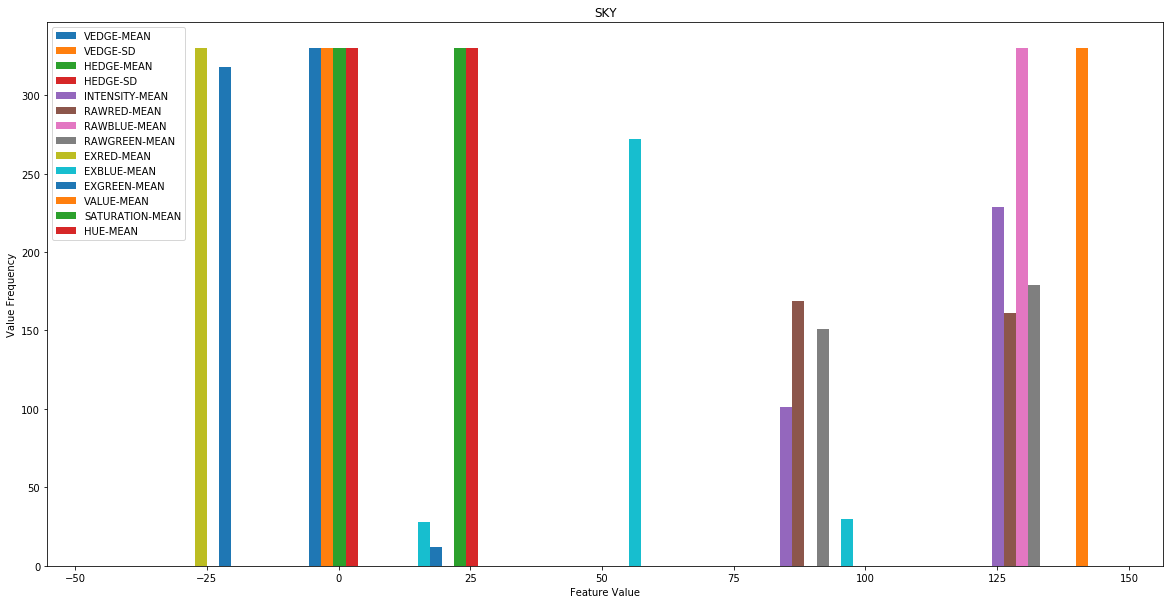

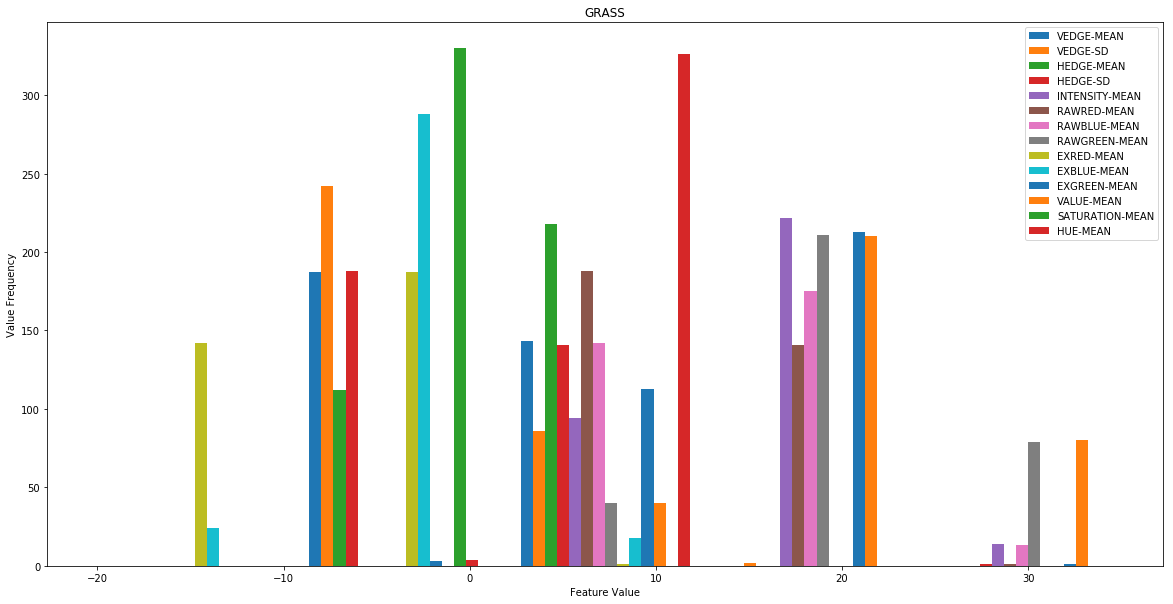

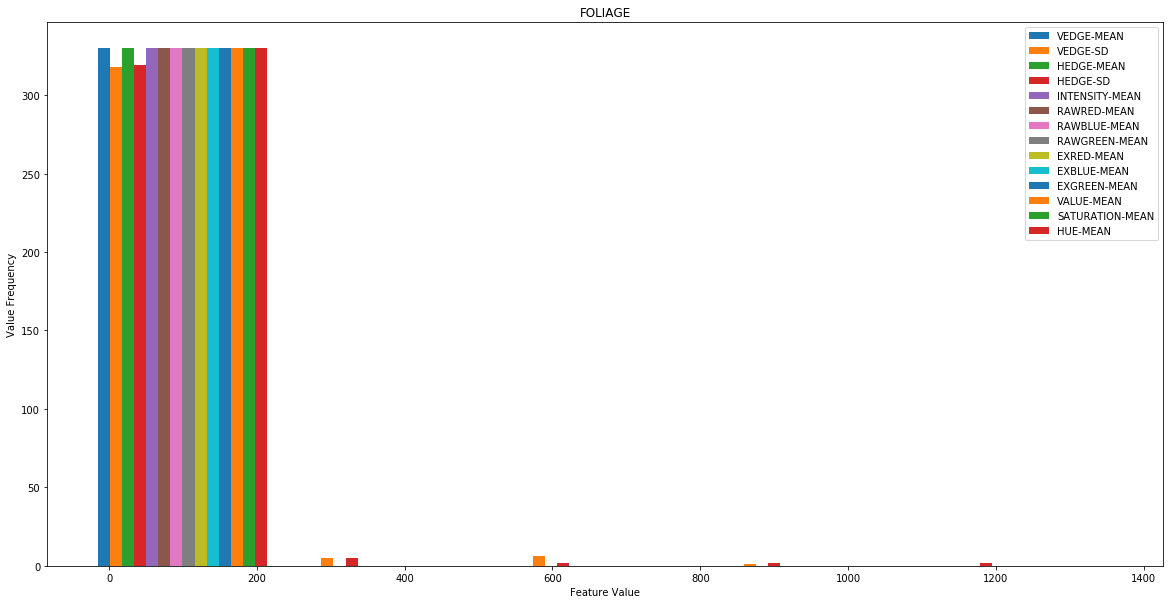

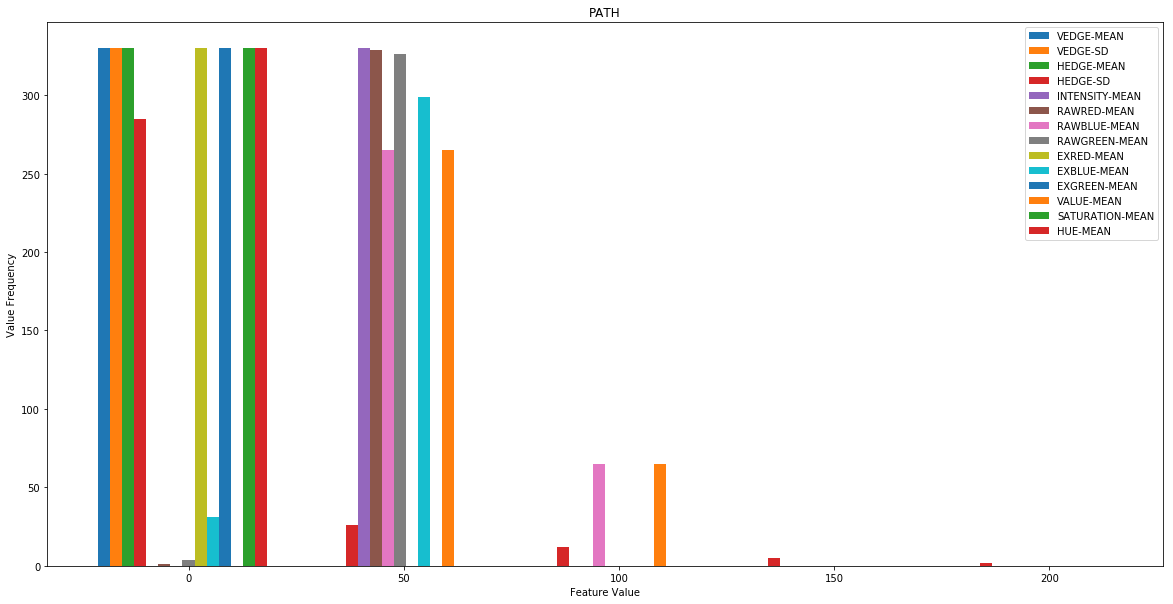

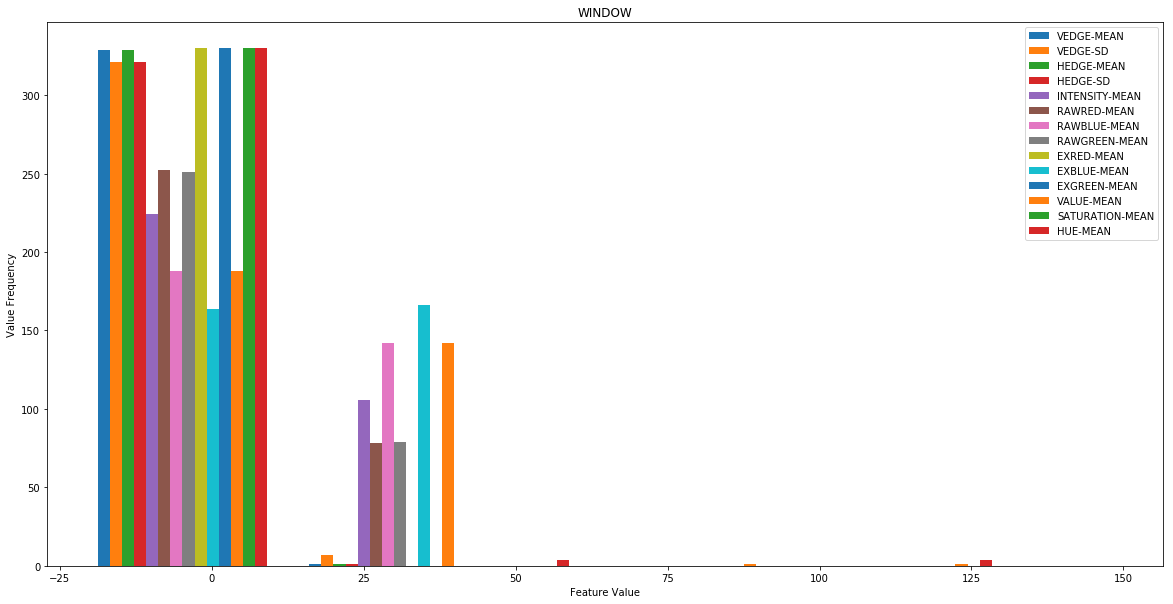

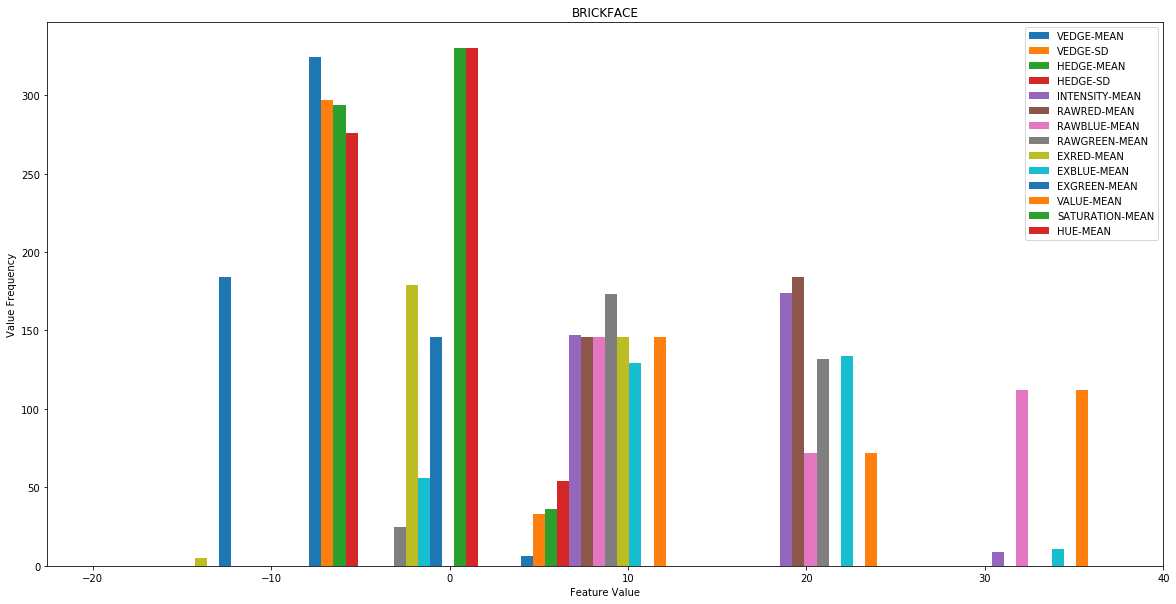

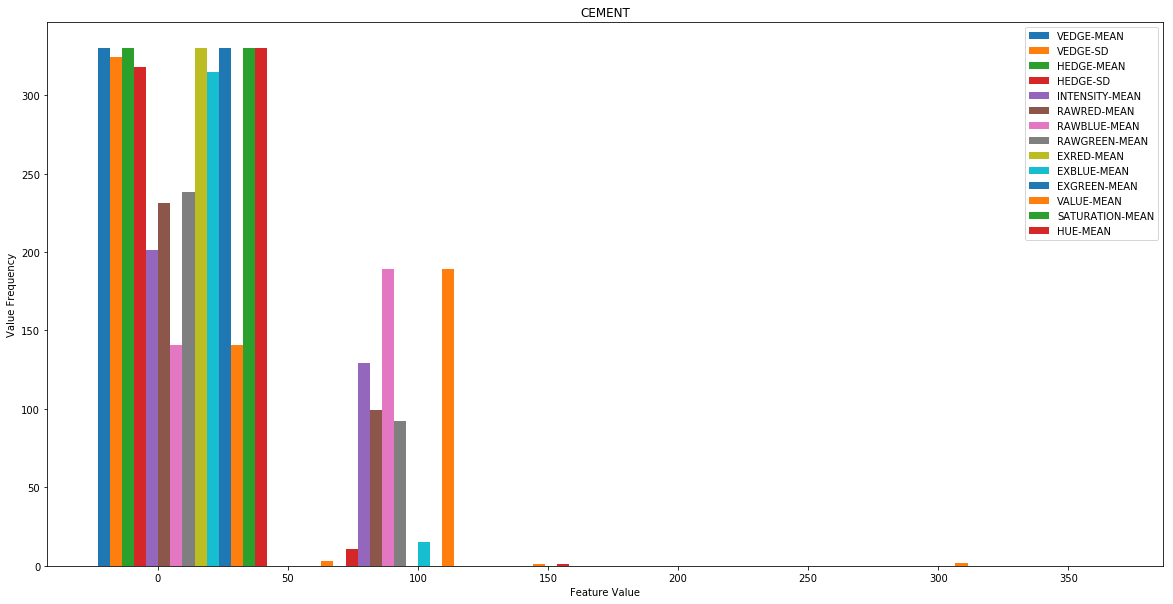

In [0]:
for obj in detected_class:
    obj_features = [data_set[i, :] for i, raw in enumerate(data_set) if raw[0] == obj]
    #ploting all features except the features from one to five because it is useless and don't add any importance to visualize them
    obj_features = np.array(obj_features)[:, 6:]
    # plot for 5 bins
    plot_hist(obj_features, 5, obj,features[:])

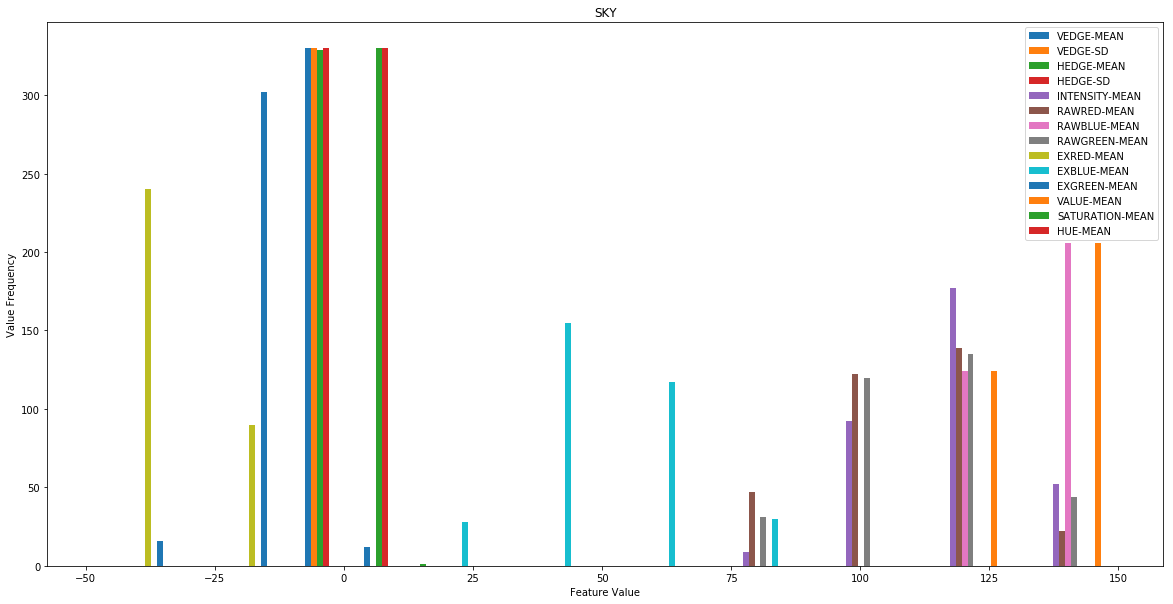

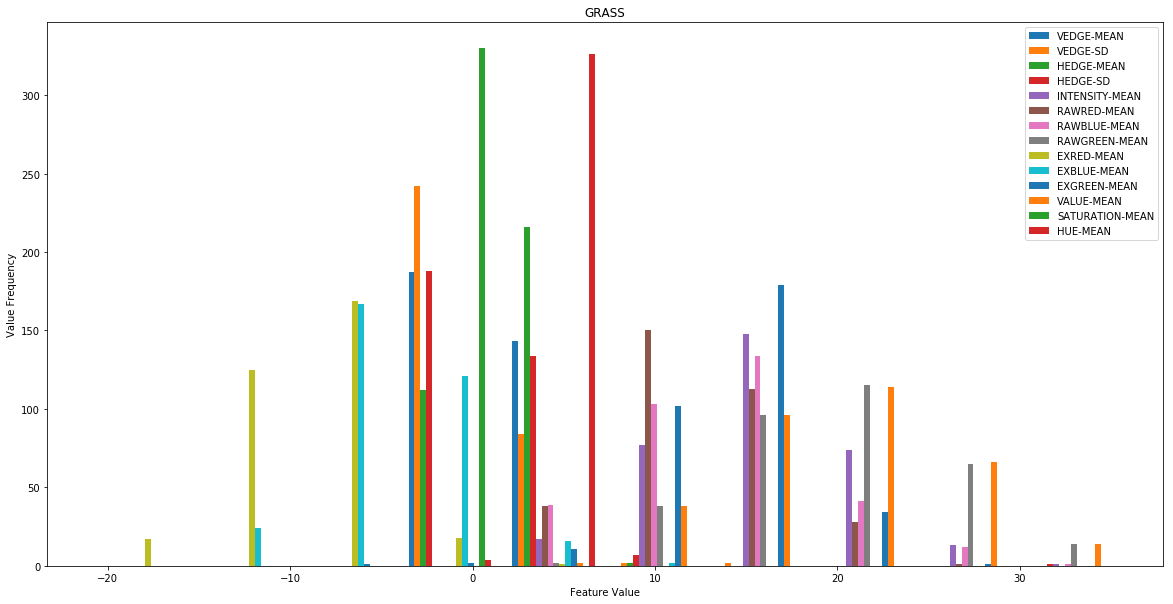

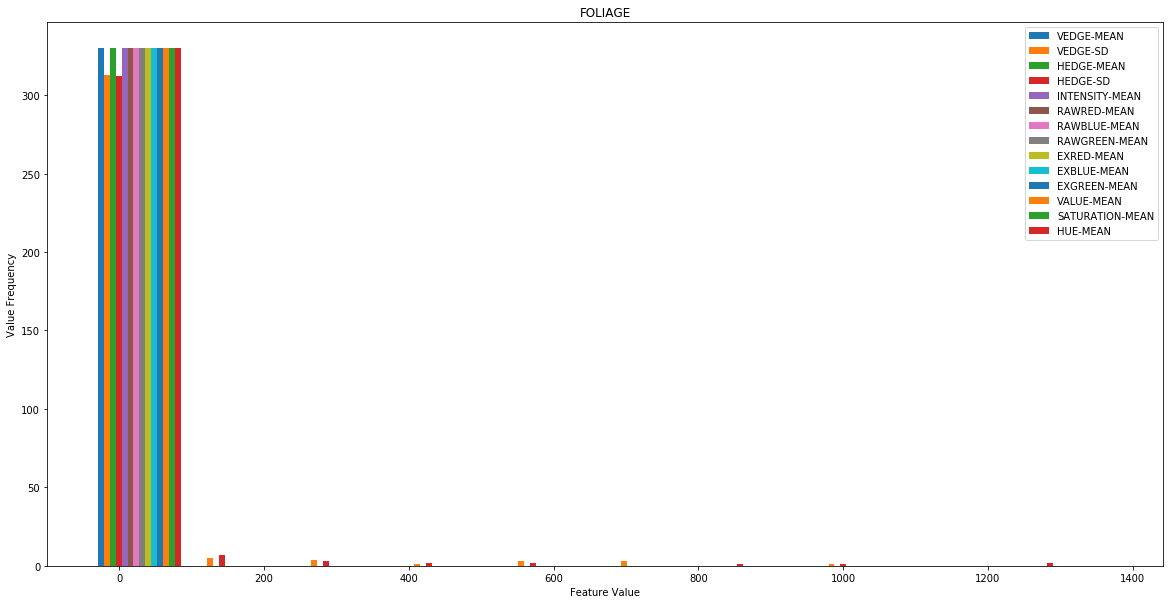

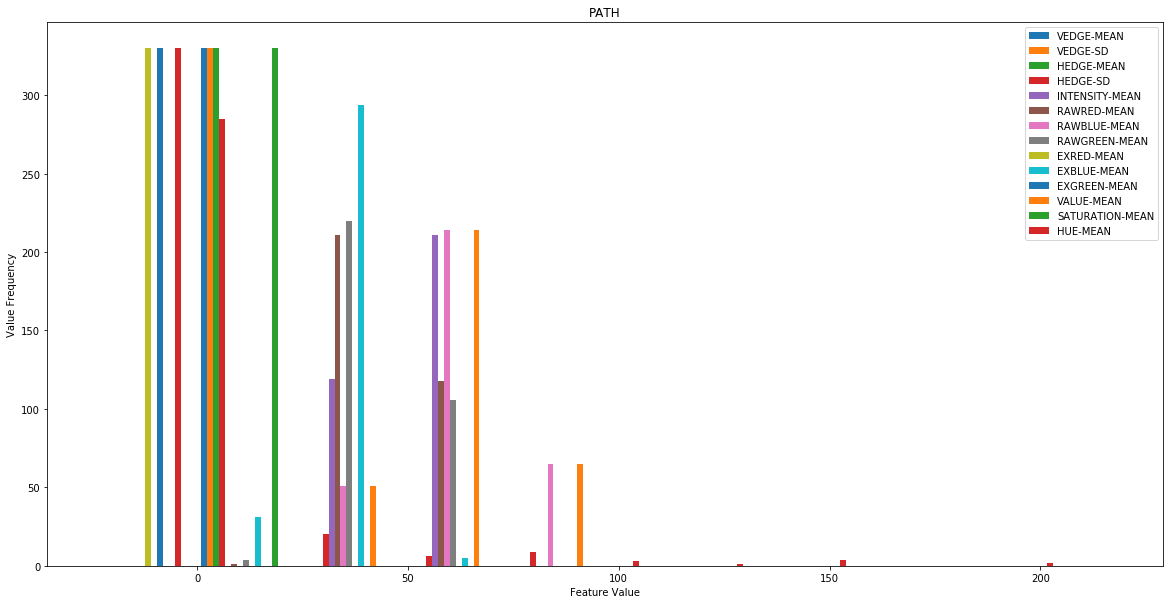

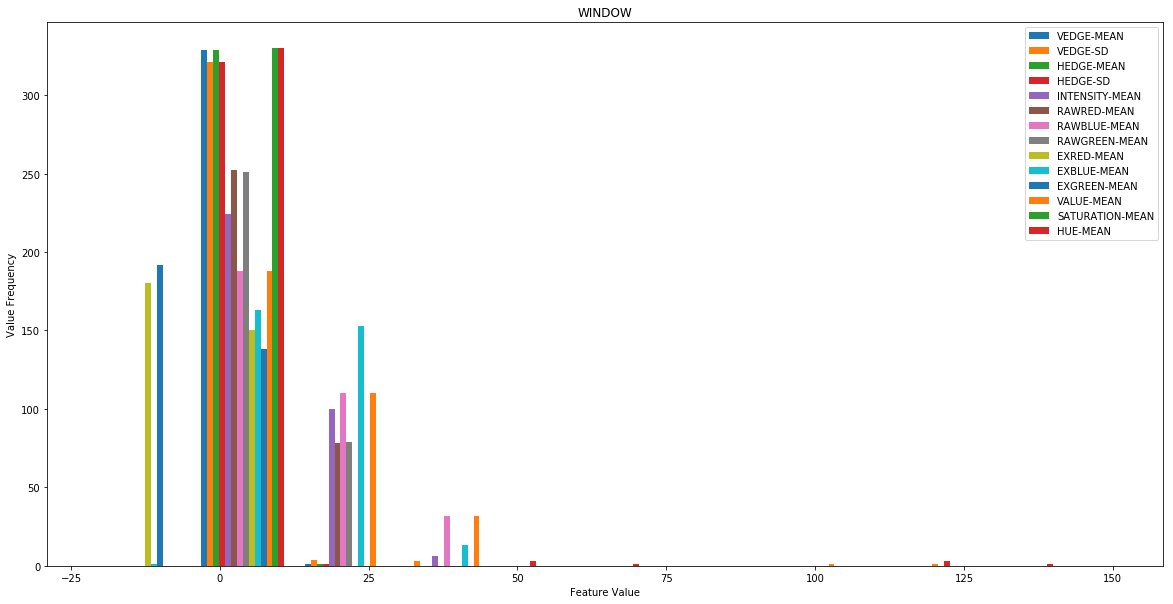

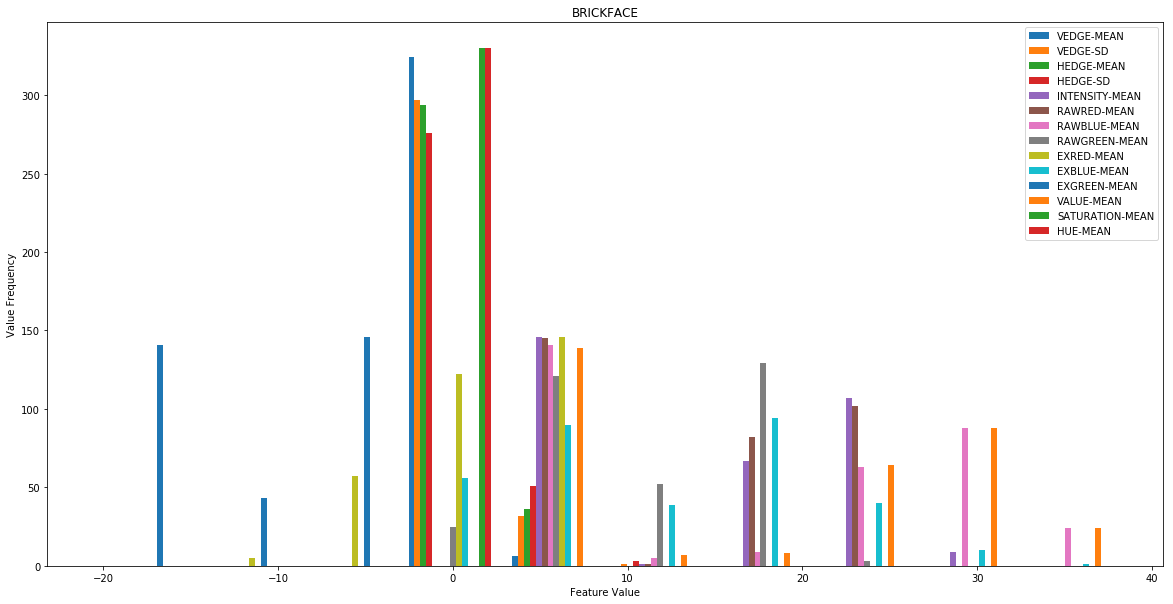

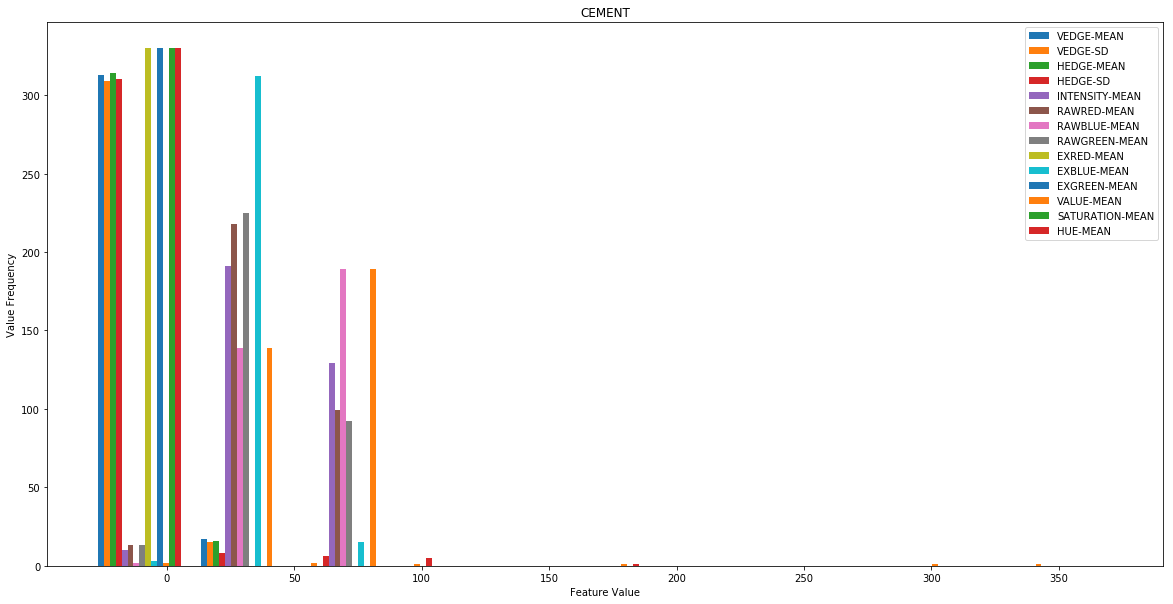

In [0]:
for obj in detected_class:
    obj_features = [data_set[i, :] for i, raw in enumerate(data_set) if raw[0] == obj]
    obj_features = np.array(obj_features)[:, 6:]
    # plot for 10 bins
    plot_hist(obj_features, 10, obj,features[:])

# Plotting Boxplots

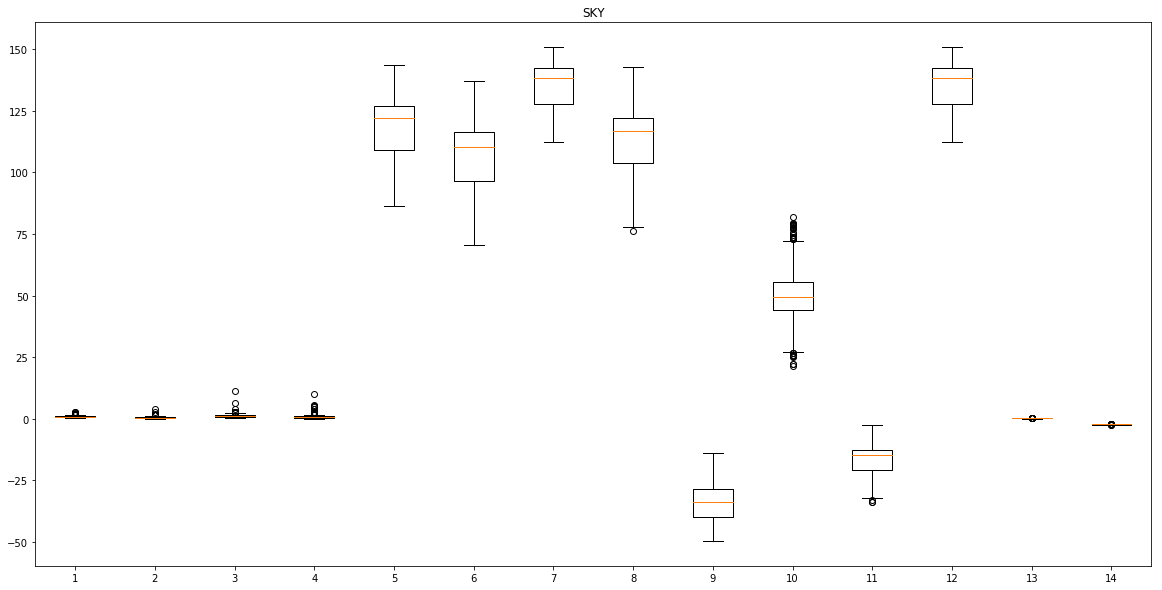

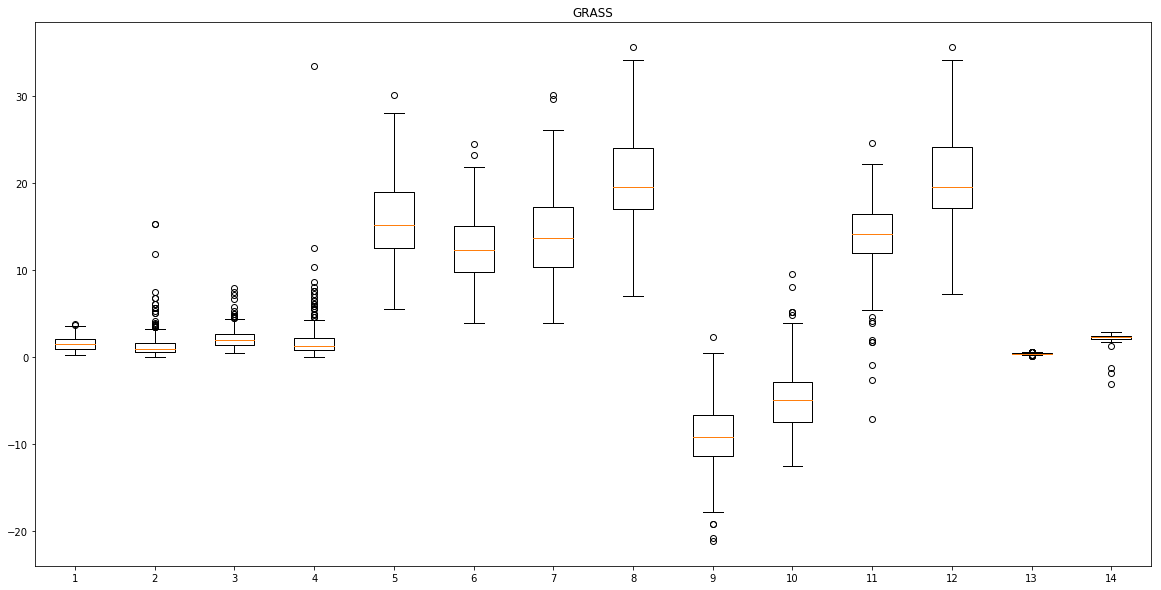

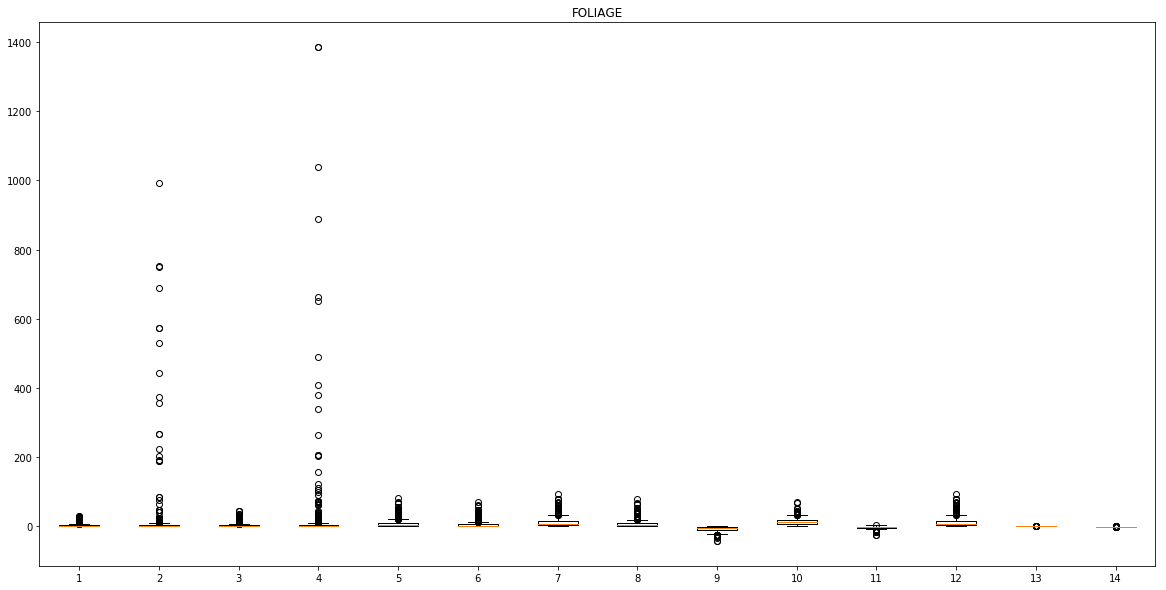

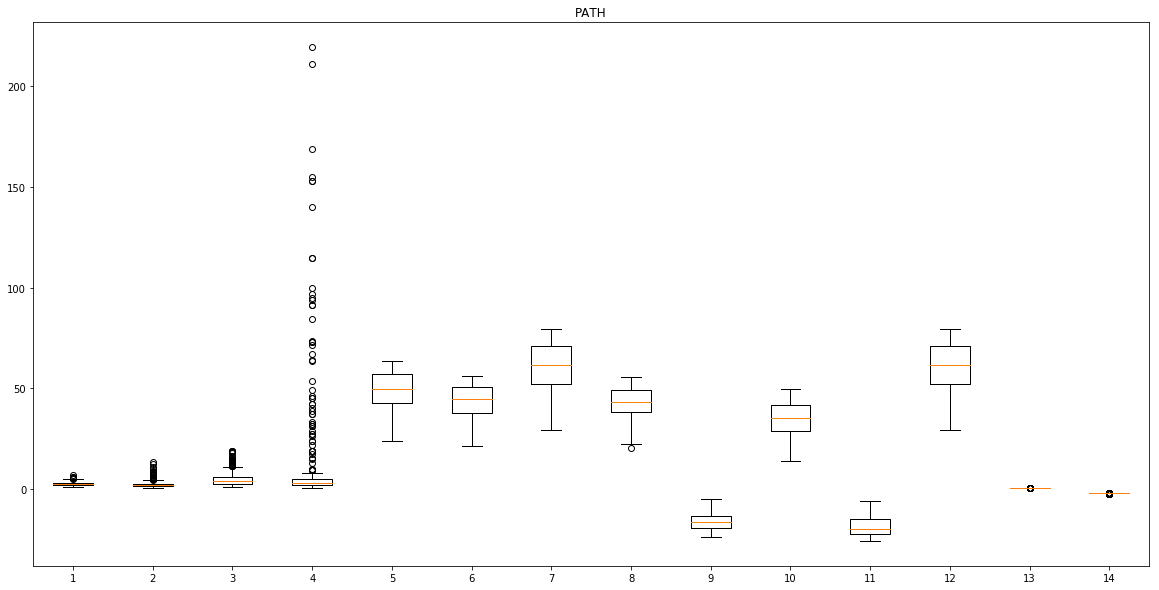

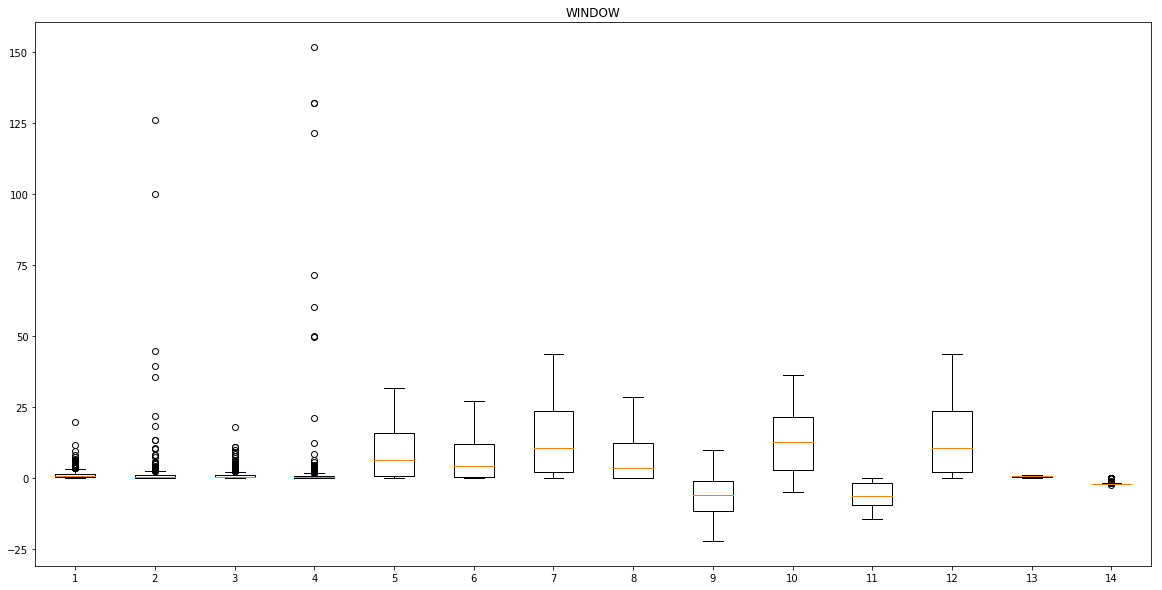

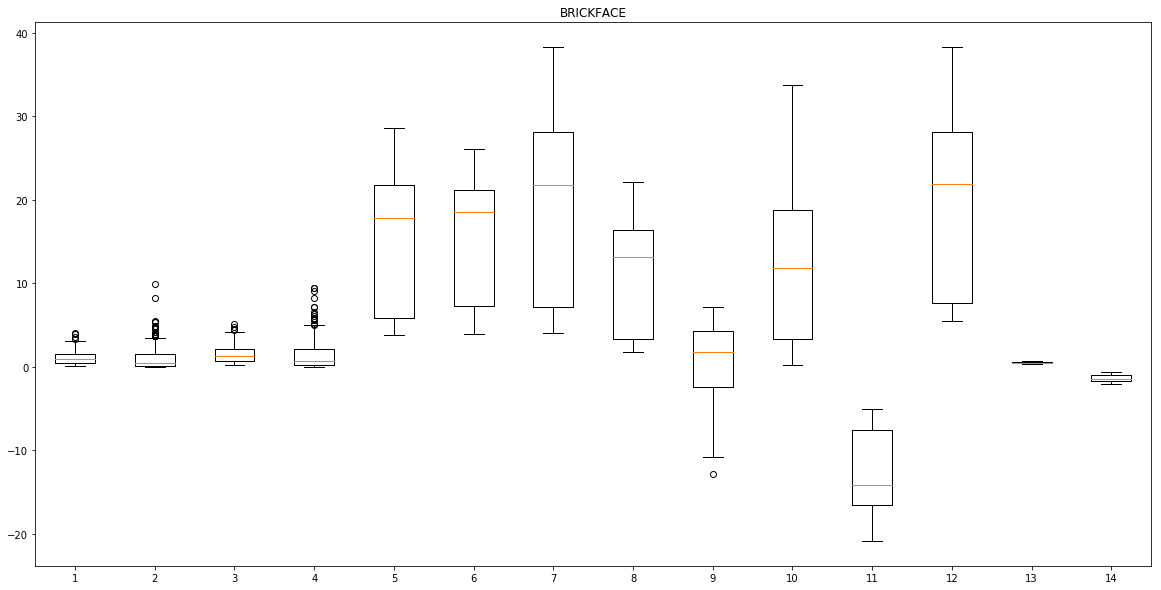

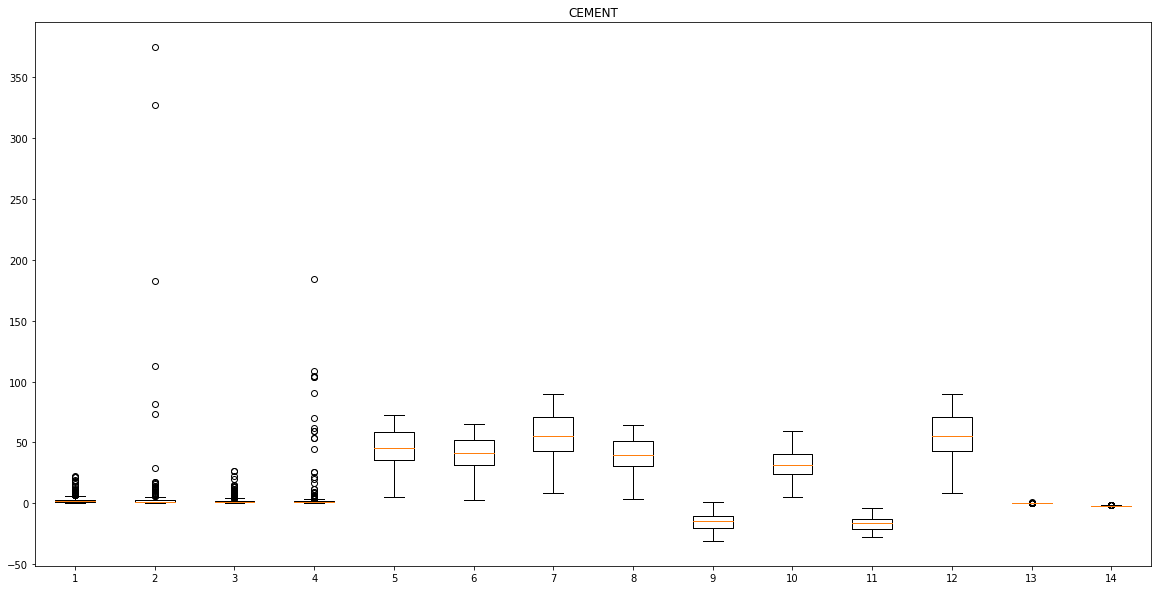

In [0]:
def show_boxplot(x, title):
    plt.figure(figsize=[20,10])
    plt.boxplot(x)
    plt.title(title)
    plt.show()

# plot the boxplots for each class individually
for obj in detected_class:
    obj_features = [data_set[i, :] for i, raw in enumerate(data_set) if raw[0] == obj]
    obj_features = np.array(obj_features)[:, 6:]
    show_boxplot(obj_features, obj)

# Normalization


1.   **Min Max Scaler**

In [0]:
# scale data
min_max_scaler = preprocessing.MinMaxScaler(copy=True)
# fit and transform
data_set_min_max_score = min_max_scaler.fit_transform(data_set[:, 1:])
display(pd.DataFrame(data_set_min_max_score))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.549407,0.475000,0.0,0.000000,0.0,0.009506,0.000063,0.014907,0.000224,0.043119,0.053485,0.050810,0.024942,0.891791,0.178824,0.444023,0.051546,0.545635,0.322724
1,0.739130,0.508333,0.0,0.000000,0.0,0.011407,0.000269,0.011180,0.000056,0.046476,0.060778,0.051546,0.027280,0.917910,0.167059,0.436433,0.055965,0.538580,0.355797
2,0.411067,0.533333,0.0,0.000000,0.0,0.009506,0.000108,0.018634,0.000377,0.042603,0.055105,0.047865,0.024942,0.906716,0.167059,0.447818,0.050074,0.532628,0.348892
3,0.130435,0.525000,0.0,0.000000,0.0,0.017110,0.000168,0.024845,0.000342,0.040795,0.056726,0.042710,0.023383,0.930970,0.150588,0.449715,0.051546,0.573633,0.386107
4,0.150198,0.416667,0.0,0.000000,0.0,0.024715,0.000377,0.019876,0.000310,0.042086,0.051053,0.050810,0.024162,0.882463,0.183529,0.445920,0.052283,0.562919,0.313666
5,0.059289,0.487500,0.0,0.000000,0.0,0.017110,0.000078,0.014907,0.000224,0.038730,0.050243,0.044183,0.021824,0.901119,0.167059,0.453510,0.047128,0.561508,0.345557
6,0.098814,0.233333,0.0,0.333333,0.0,0.034221,0.000896,0.054658,0.002298,0.139427,0.142626,0.171576,0.102104,0.811567,0.318824,0.299810,0.171576,0.436939,0.238552
7,0.051383,0.412500,0.0,0.000000,0.0,0.058935,0.005397,0.059627,0.000737,0.124968,0.137763,0.142121,0.094310,0.882463,0.243529,0.349146,0.142121,0.368848,0.285241
8,0.039526,0.404167,0.0,0.000000,0.0,0.045627,0.000807,0.031056,0.000687,0.123160,0.138574,0.139912,0.090413,0.901119,0.241176,0.333966,0.139912,0.388756,0.292453
9,0.332016,0.375000,0.0,0.000000,0.0,0.045627,0.001300,0.028571,0.000879,0.148464,0.154781,0.177467,0.111458,0.830224,0.305882,0.301708,0.177467,0.404792,0.249398


**Visualizing data after normalization by Min Max Scaler**


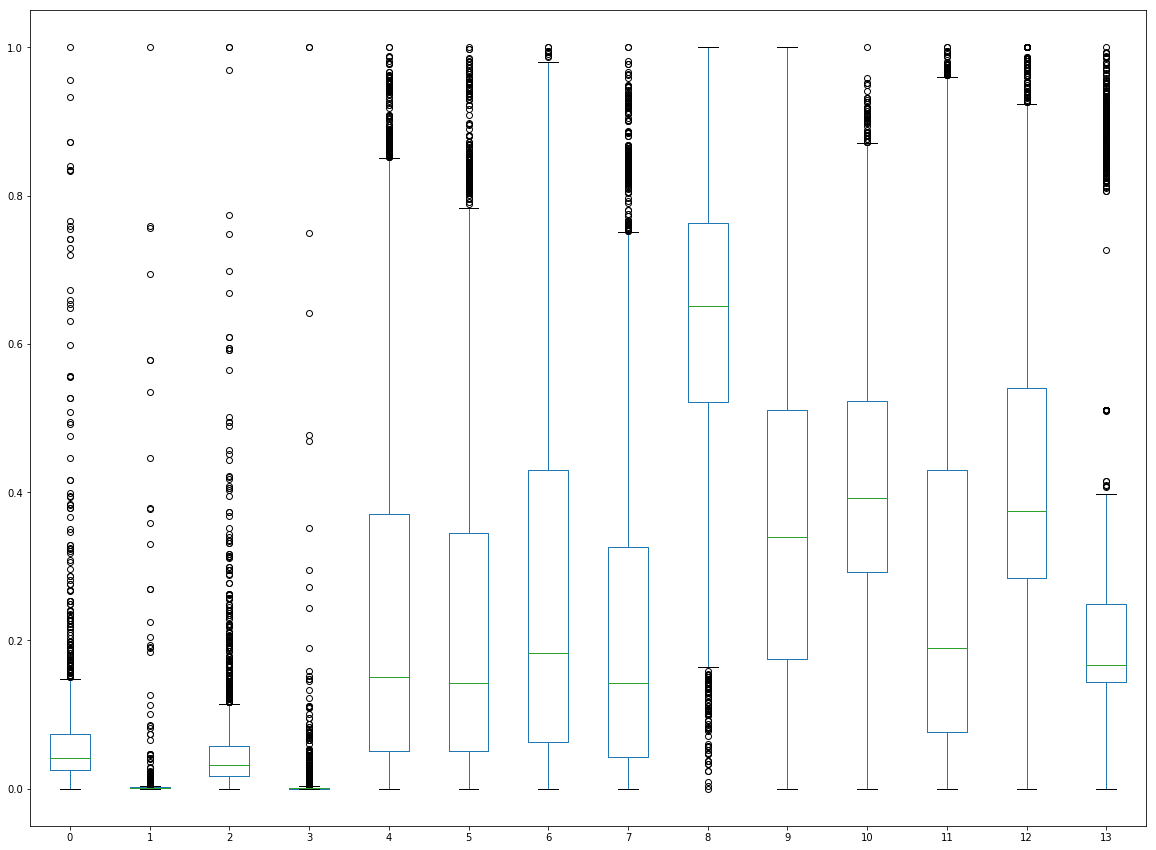

In [0]:
fig = plt.figure(figsize = (20,15))
box = pd.DataFrame(data_set_min_max_score[:,5:])
box.boxplot(grid=False)

**Comment** : After Min Max Normalization we could see that data is not skewed that much.
So all attribute now have nearly the same range and we can visualize the data easily. Besides we can see the correlation between the attributes.

# Z Score Normalization

In [0]:
# scale data
z_score_scaler = preprocessing.StandardScaler(copy=True, with_std=True, with_mean=True)
# fit and transform
data_set_z_score = z_score_scaler.fit_transform(data_set[:, 1:])
display(pd.DataFrame(data_set_z_score))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.206827,0.027539,0.0,-0.357047,-0.194552,-0.598950,-0.125931,-0.487090,-0.134911,-0.808696,-0.727621,-0.839220,-0.841382,1.393250,-0.866965,0.071789,-0.870602,0.520205,0.156038
1,0.864896,0.166738,0.0,-0.357047,-0.194552,-0.578361,-0.121388,-0.533267,-0.138879,-0.796081,-0.699073,-0.836667,-0.832214,1.527569,-0.923748,0.033306,-0.855067,0.489298,0.283547
2,-0.273014,0.271138,0.0,-0.357047,-0.194552,-0.598950,-0.124940,-0.440914,-0.131320,-0.810636,-0.721277,-0.849433,-0.841382,1.470004,-0.923748,0.091031,-0.875781,0.463221,0.256926
3,-1.246407,0.236338,0.0,-0.357047,-0.194552,-0.516594,-0.123619,-0.363952,-0.132139,-0.817429,-0.714933,-0.867306,-0.847494,1.594729,-1.003245,0.100651,-0.870602,0.642864,0.400405
4,-1.177858,-0.216061,0.0,-0.357047,-0.194552,-0.434239,-0.118993,-0.425521,-0.132895,-0.812577,-0.737137,-0.839220,-0.844438,1.345279,-0.844252,0.081410,-0.868013,0.595925,0.121116
5,-1.493183,0.079739,0.0,-0.357047,-0.194552,-0.516595,-0.125601,-0.487090,-0.134911,-0.825192,-0.740309,-0.862199,-0.853607,1.441221,-0.923748,0.119893,-0.886138,0.589744,0.244069
6,-1.356085,-0.981659,0.0,2.410668,-0.194552,-0.331294,-0.107511,0.005464,-0.086031,-0.446749,-0.378706,-0.420492,-0.538826,0.980699,-0.191244,-0.659387,-0.448554,0.044012,-0.168482
7,-1.520602,-0.233461,0.0,-0.357047,-0.194552,-0.063638,-0.007973,0.067033,-0.122817,-0.501090,-0.397737,-0.522621,-0.569387,1.345279,-0.554657,-0.409248,-0.552124,-0.254292,0.011522
8,-1.561732,-0.268261,0.0,-0.357047,-0.194552,-0.207761,-0.109493,-0.286990,-0.124013,-0.507882,-0.394565,-0.530281,-0.584668,1.441221,-0.566014,-0.486214,-0.559892,-0.167075,0.039329
9,-0.547209,-0.390060,0.0,-0.357047,-0.194552,-0.207761,-0.098589,-0.317775,-0.119478,-0.412787,-0.331126,-0.400066,-0.502153,1.076641,-0.253706,-0.649766,-0.427840,-0.096823,-0.126668



Visualizing data after normalization by Z Score


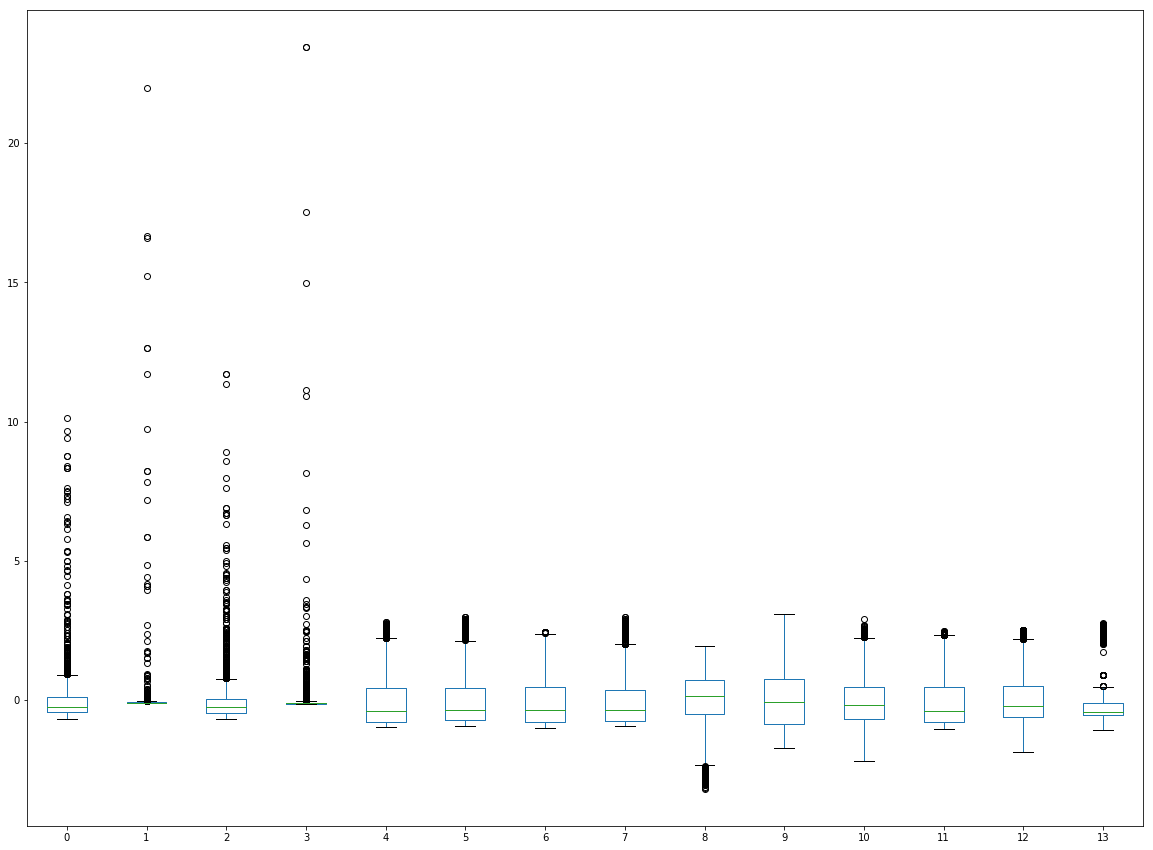

In [0]:
fig = plt.figure(figsize = (20,15))
box = pd.DataFrame(data_set_z_score[:,5:])
box.boxplot(grid=False)

**Comment** : After Z score Normalization we could see that data is not skewed that much.
So all attribute now have nearly the same range and we can visualize the data easily. Besides we can see the correlation between the attributes.

# Dimensionality reduction¶


1.    **Feature Projection Using PCA¶**

      Apply PCA on the dataset after being normalized by z-score normalization.

In [0]:
def doPCA(comp):
  
    pca = PCA(n_components=comp)
    #do pca on z-score normalized data
    pca.fit_transform(data_set_z_score)
    return pca

In [0]:
pca = doPCA(19)

**the realation between number of PCA components taken and the variance ratio**

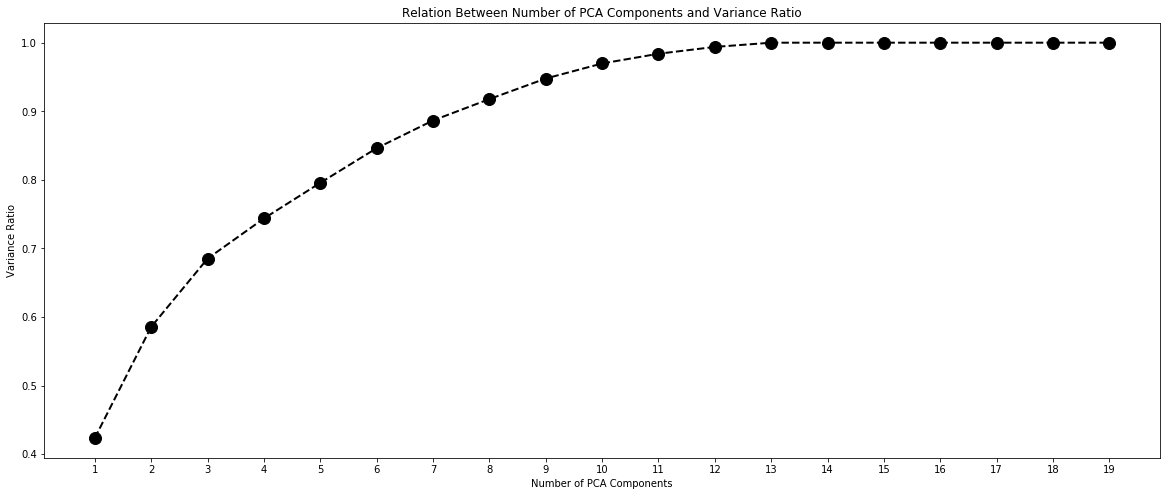

In [0]:
# visualize the PCA component
plt.figure(figsize=(20,8))
plt.title('Relation Between Number of PCA Components and Variance Ratio')
plt.xlabel('Number of PCA Components')
plt.ylabel('Variance Ratio')
plt.xticks([i for i in range(1, 20)])
plt.plot([i for i in range(1, 20)], pca.explained_variance_ratio_.cumsum(), color='black', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.show()

We will reduce the dimensions to 8 features covering more than 90% of total variance.

In [0]:
# the variance percentage captured by each component
print('the variance percentage captured by each component = \n {}'.format(pca.explained_variance_ratio_.cumsum()))

the variance percentage captured by each component = 
 [0.42341135 0.58544784 0.68504234 0.74361518 0.79559514 0.84609887
 0.88651302 0.91771445 0.94771247 0.96966275 0.98388365 0.99381892
 0.99998259 1.         1.         1.         1.         1.
 1.        ]


In [0]:
print("Dataset after applying PCA Dimensionality Reduction")
transformed_data = pca.transform(data_set_z_score)
pca_data = pd.DataFrame(transformed_data)
display(pca_data)

Dataset after applying PCA Dimensionality Reduction


,0,1,2,3,4,5,6,7
0,-2.341008,-0.568638,-0.650548,-0.477064,-0.054783,-0.136842,0.012842,-0.620450
1,-2.397916,-0.598568,-0.432085,-0.911518,0.367182,-0.322516,0.011735,-0.641841
2,-2.456240,-0.543694,-0.532037,-0.138027,-0.329315,0.081578,-0.164498,-0.599736
3,-2.605458,-0.473095,-0.649493,0.523324,-0.986728,0.381044,-0.184762,-0.539207
4,-2.312929,-0.446292,-0.973609,0.452582,-0.968599,0.242354,-0.022998,-0.538380
5,-2.492446,-0.517895,-0.825480,0.673388,-1.143871,0.416263,-0.137053,-0.507198
6,-0.850164,-0.286840,-1.022699,2.614527,0.284934,-1.136283,0.082629,-0.881976
7,-1.329456,-0.017900,-0.791821,0.775720,-1.054178,0.385493,-0.718778,-0.809541
8,-1.389388,-0.302241,-0.907463,0.792834,-1.079289,0.389286,-0.604281,-0.824284
9,-0.894579,-0.311445,-0.964252,0.106209,-0.404760,0.048909,-0.463270,-0.659446




Visualize the correlation matrix of dataset after applying PCA


,0,1,2,3,4,5,6,7
0,1.000000e+00,-7.741717e-17,1.300965e-16,3.759250e-16,4.672305e-17,-1.077295e-16,-1.501276e-17,2.140314e-16
1,-7.741717e-17,1.000000e+00,-1.049348e-16,4.896370e-17,-3.019361e-16,-4.659102e-17,3.008783e-16,-1.567668e-16
2,1.300965e-16,-1.049348e-16,1.000000e+00,-2.438396e-17,-4.139612e-17,4.790757e-17,7.892770e-17,-7.287944e-17
3,3.759250e-16,4.896370e-17,-2.438396e-17,1.000000e+00,8.507041e-16,1.096728e-15,9.785032e-17,-2.419265e-16
4,4.672305e-17,-3.019361e-16,-4.139612e-17,8.507041e-16,1.000000e+00,-4.169040e-19,-2.281307e-16,-1.308534e-16
5,-1.077295e-16,-4.659102e-17,4.790757e-17,1.096728e-15,-4.169040e-19,1.000000e+00,2.010923e-17,-3.009077e-16
6,-1.501276e-17,3.008783e-16,7.892770e-17,9.785032e-17,-2.281307e-16,2.010923e-17,1.000000e+00,-5.673376e-16
7,2.140314e-16,-1.567668e-16,-7.287944e-17,-2.419265e-16,-1.308534e-16,-3.009077e-16,-5.673376e-16,1.000000e+00


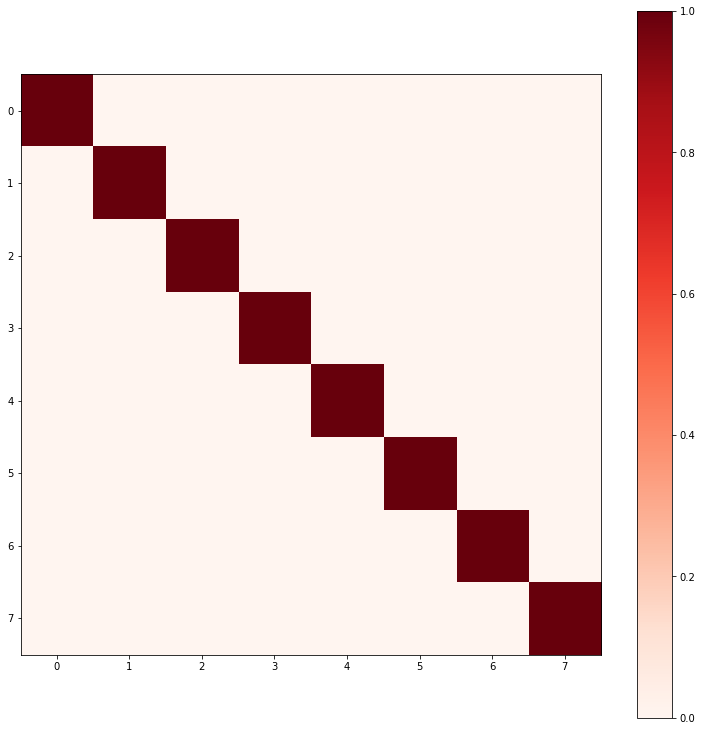

In [0]:
pca_corr_matrix = pca_data.corr()
display(pca_corr_matrix)
visualize_matrix(pca_corr_matrix)



**Conclusion**: From the previous matrix we can see that all attributes are not correlated. And we actually expect that as PCA gives the resulting vectors are an uncorrelated orthogonal basis set.




**2.   Feature Selection**

choose k = 8

In [0]:
# Feature selection
selector = SelectKBest(k=8)
best_features = selector.fit_transform(data_set_z_score, data_set[:, 0])
reduced_data = pd.DataFrame(best_features)
print("Dataset after applying feature selection with the best 8 features")
display(reduced_data)

Dataset after applying feature selection with the best 8 features


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [2] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,0,1,2,3,4,5,6,7
0,0.027539,-0.808696,-0.727621,-0.839220,-0.841382,0.071789,-0.870602,0.156038
1,0.166738,-0.796081,-0.699073,-0.836667,-0.832214,0.033306,-0.855067,0.283547
2,0.271138,-0.810636,-0.721277,-0.849433,-0.841382,0.091031,-0.875781,0.256926
3,0.236338,-0.817429,-0.714933,-0.867306,-0.847494,0.100651,-0.870602,0.400405
4,-0.216061,-0.812577,-0.737137,-0.839220,-0.844438,0.081410,-0.868013,0.121116
5,0.079739,-0.825192,-0.740309,-0.862199,-0.853607,0.119893,-0.886138,0.244069
6,-0.981659,-0.446749,-0.378706,-0.420492,-0.538826,-0.659387,-0.448554,-0.168482
7,-0.233461,-0.501090,-0.397737,-0.522621,-0.569387,-0.409248,-0.552124,0.011522
8,-0.268261,-0.507882,-0.394565,-0.530281,-0.584668,-0.486214,-0.559892,0.039329
9,-0.390060,-0.412787,-0.331126,-0.400066,-0.502153,-0.649766,-0.427840,-0.126668



Visualize the reduced dataset of 8 features using boxplots.
**Expected to be nearly the same.**


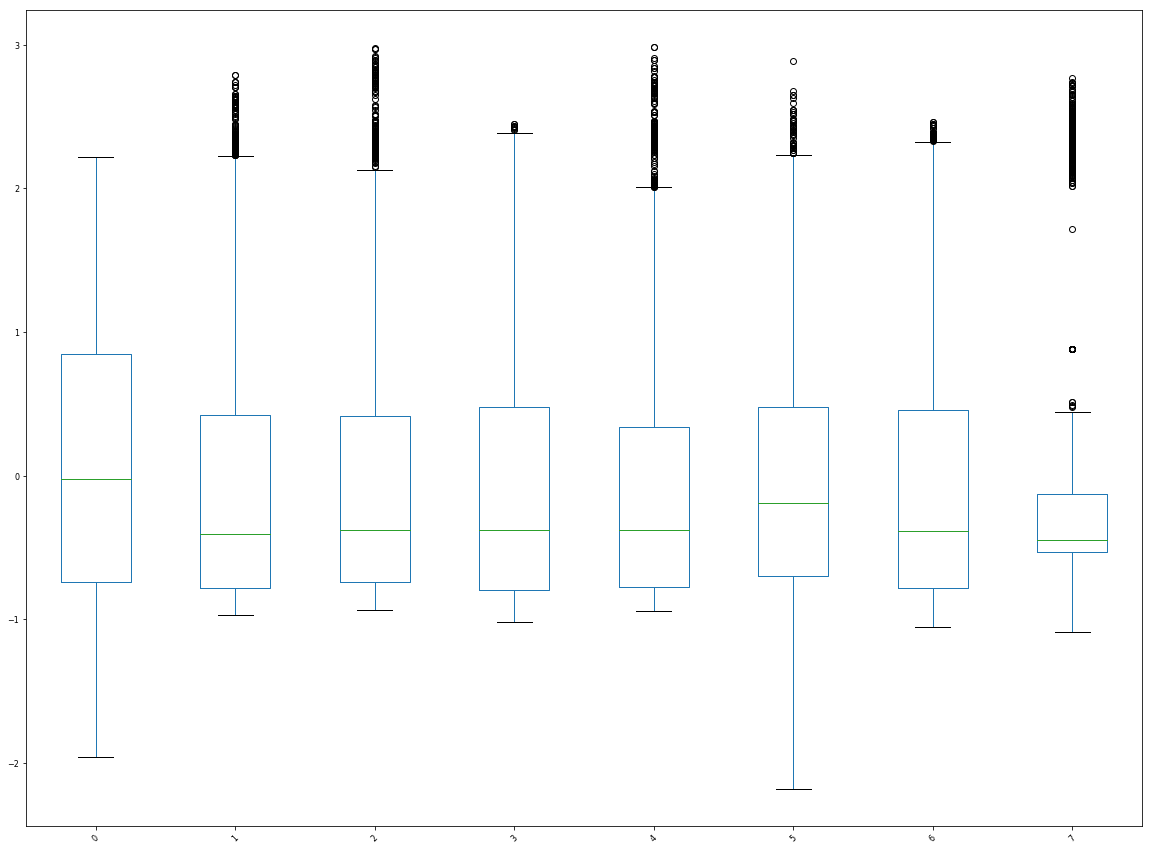

In [0]:
reduced_data.boxplot(grid=False, fontsize=8, rot=45, figsize=(20,15))

Visualize the correlation matrix between the **8** features

,0,1,2,3,4,5,6,7
0,1.000000,-0.465240,-0.468009,-0.481521,-0.437971,0.476421,-0.458388,0.592930
1,-0.465240,1.000000,0.998112,0.995809,0.995842,-0.509756,0.997385,-0.329845
2,-0.468009,0.998112,1.000000,0.990813,0.994056,-0.507899,0.992062,-0.328574
3,-0.481521,0.995809,0.990813,1.000000,0.984659,-0.573816,0.998644,-0.384925
4,-0.437971,0.995842,0.994056,0.984659,1.000000,-0.429265,0.990042,-0.261516
5,0.476421,-0.509756,-0.507899,-0.573816,-0.429265,1.000000,-0.538610,0.800497
6,-0.458388,0.997385,0.992062,0.998644,0.990042,-0.538610,1.000000,-0.341337
7,0.592930,-0.329845,-0.328574,-0.384925,-0.261516,0.800497,-0.341337,1.000000


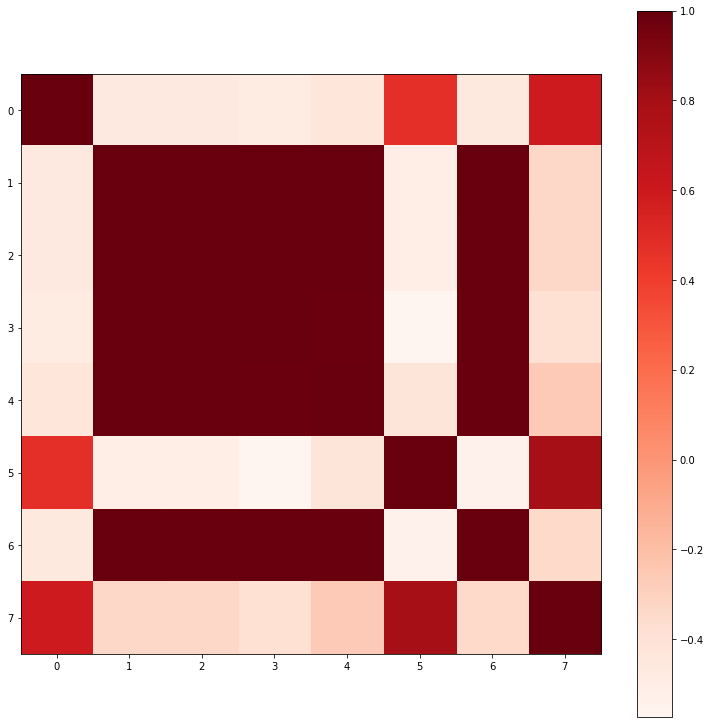

In [0]:
sub_corr_matrix = reduced_data.corr()
display(sub_corr_matrix)
visualize_matrix(sub_corr_matrix)

**Try with K=6**

In [0]:
selector = SelectKBest(k=6)
best_features = selector.fit_transform(data_set_z_score, data_set[:, 0])
reduced_data = pd.DataFrame(best_features)

Visualize the reduced dataset of 6 features using boxplots. Expected to be nearly the same.

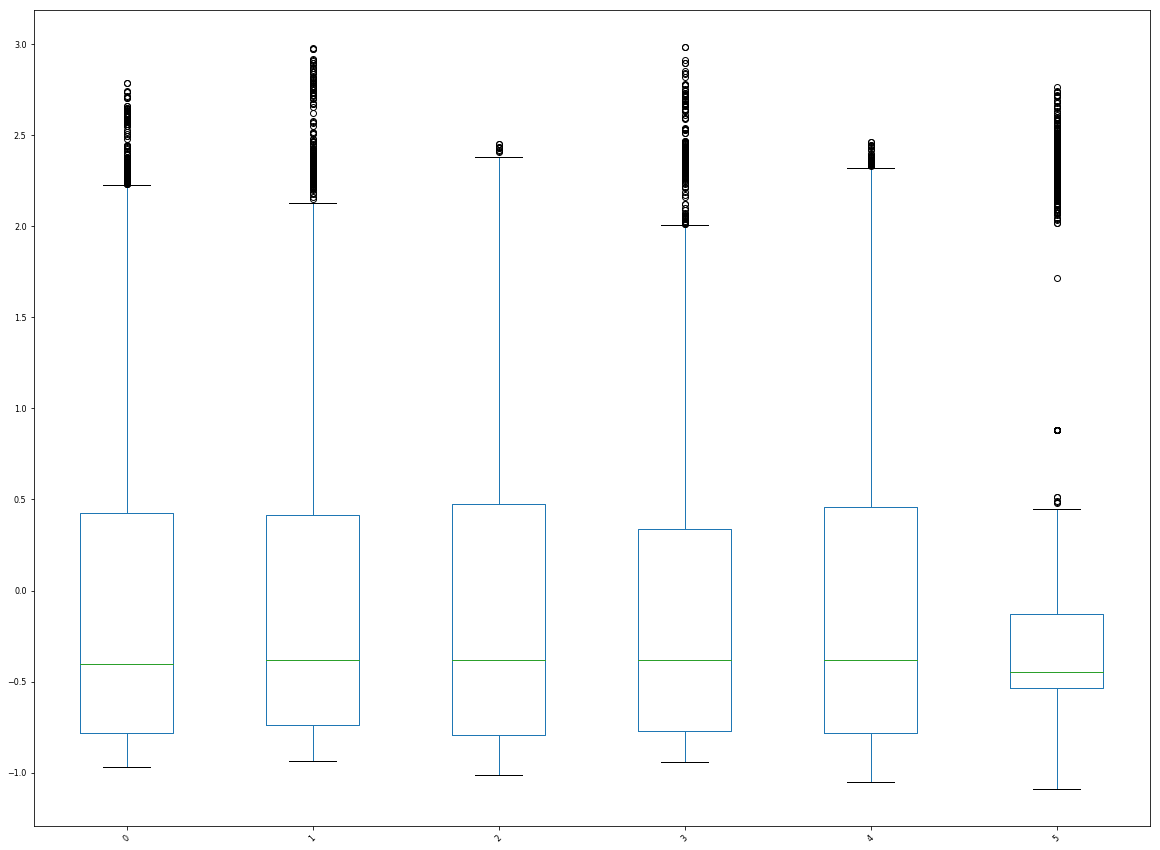

In [0]:
reduced_data.boxplot(grid=False, fontsize=8, rot=45, figsize=(20,15))

Visualize the correlation matrix between the **6** features

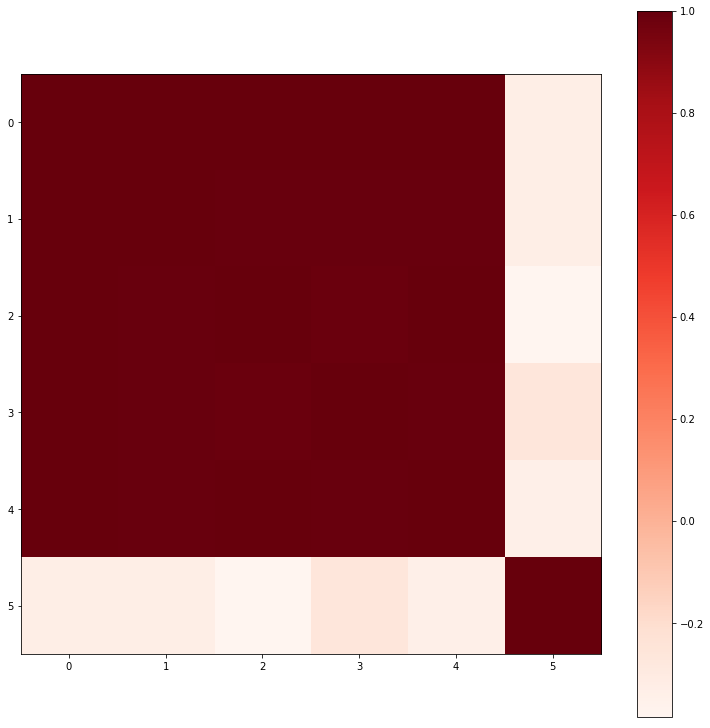

In [0]:
visualize_matrix(reduced_data.corr())

**Conclusion**: Feature Selection on the other hand of PCA gives us features which are highly correlated with each other. So they are not the optimal dimensionality reduction because we can reduce the correlated attributes further more and get small number of features.